# Phase 5 Final Project: **Predicting Job Change of Data Scientists**


**Deanna Gould**  
Data Science Flex  
Instructor: Morgan Jones  
Presentation Date: September 27, 2023

## Overview

### Business Problem

The company that is conducting this study is very prominent in Big Data and Data Science. The company offers training courses for data scientists and will attempt to recruit successful candidates after the completion of the training. The company would like to allocate resources appropriately, so it's important to determine which candidates are interested in working with the company after graduation, and which candidates will move onto something else. 

### About the Data

This dataset is a kaggle dataset, which provides features that might impact whether or not a data scientist will be looking for a new job. The included columns are listed below, and the dataset can be found [here.](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists)

`enrollee_id` : Unique ID for candidate  

`city` : City code  

`city_development_index` : Developement index of the city (scaled)  

`gender` : Gender of candidate  

`relevent_experience` : Relevant experience of candidate  

`enrolled_university` : Type of University course enrolled if any  

`education_level` : Education level of candidate  

`major_discipline`  :Education major discipline of candidate  

`experience` : Candidate total experience in years  

`company_size` : No of employees in current employer's company  

`company_type` : Type of current employer  

`last_new_job` : Difference in years between previous job and current job  

`training_hours` : training hours completed  

`target` : 0 – Not looking for job change, 1 – Looking for a job change  

## Importing Libraries

In [49]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import libraries for processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix)
from sklearn.impute import SimpleImputer

# Import libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

## Creating Functions

In [2]:
# Creating a confusion matrix that will be used several times

def conf_matrix(estimator, Xtr, ytr):
    cm1 = plot_confusion_matrix(estimator, Xtr, ytr, cmap = 'flare')
    cm2 = plot_confusion_matrix(estimator, Xtr, ytr, normalize = 'true', cmap = 'flare')
    return cm1, cm2

# Creating a function for grid scores

def grid_scores(estimator, Xtr, ytr):
    f1_score = estimator.best_score_
    best_params = estimator.best_params_
    best_estimator = estimator.best_estimator_.score(Xtr, ytr)
    print('Average F1 Score: ', f1_score)
    print('Best Parameters: ', best_params)
    print('Best Estimator Score: ', best_estimator)
    
def col_percents(df_name, col, value1, value2, value3=None):
    """
    This function provides the value counts, percentages and visualizations for columns which 3 values or less.
    """
    print(df_name[col].value_counts())
    print('--------------------------')
    print('\n')
    
    value_1 = len(df_name[df_name[col] == value1])
    value_2 = len(df_name[df_name[col] == value2])
    value_3 = len(df_name[df_name[col] == value3])
    missing_value = len(df_name[df_name[col].isnull()])
    print('Percentage of {} {}: '.format(col, df_name[col].value_counts().index.tolist()[0]), (value_1/len(df_name[col])*100))
    print('percentage of {} {}:'.format(col, df_name[col].value_counts().index.tolist()[1]), (value_2/len(df_name[col])* 100))
    if value3 != None:
        print('percentage of {} {}:'.format(col, df_name[col].value_counts().index.tolist()[2]), (value_3/len(df_name[col])* 100))
    print('Percentage of Missing: ', (missing_value/len(df_name[col])*100))
    
    print('--------------------------')
    print('\n')
    
    sns.countplot(x = col, data=df_name, palette = 'pastel')

## Data Analysis

In [3]:
# Creating DataFrame

aug_train = pd.read_csv('data/aug_train.csv')
aug_test = pd.read_csv('data/aug_train.csv')
sample = pd.read_csv('data/sample_submission.csv')

aug_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
aug_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
sample.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [6]:
# Getting shape of DataFrame

aug_train.shape 

(19158, 14)

In [7]:
aug_test.shape

(19158, 14)

After looking at train and test, they are actually the same dataset, and the sample submission isn't helpful, so will only look at train then use train test split

In [8]:
df = aug_train.copy()

In [9]:
# Checking what datatypes are in the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
# Running describe and checking if anything stands out

df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

for column in

In [11]:
for column in df:
    columns = df[column]
    print(columns.value_counts(dropna = False))
    print('-------')
    print('\n\n')

2047     1
2692     1
4743     1
27272    1
25225    1
        ..
17682    1
19731    1
29972    1
25878    1
6147     1
Name: enrollee_id, Length: 19158, dtype: int64
-------



city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64
-------



0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
-------



Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64
-------



Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
-------



no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64
--

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [15]:
df['company_size'].replace({'10/49': '10-49'}, inplace = True)

In [16]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [17]:
df.drop(['enrollee_id', 'city_development_index'], axis=1, inplace=True)

In [18]:
df['relevent_experience']

0        Has relevent experience
1         No relevent experience
2         No relevent experience
3         No relevent experience
4        Has relevent experience
                  ...           
19153     No relevent experience
19154    Has relevent experience
19155    Has relevent experience
19156    Has relevent experience
19157     No relevent experience
Name: relevent_experience, Length: 19158, dtype: object

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
--------------------------


Percentage of relevent_experience Has relevent experience:  71.99081323728991
percentage of relevent_experience No relevent experience: 28.009186762710097
Percentage of Missing:  0.0
--------------------------




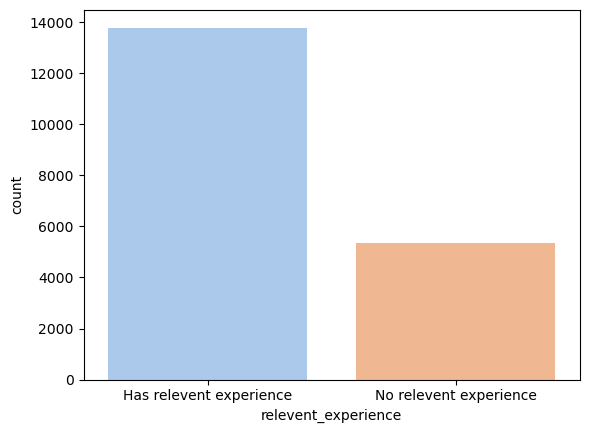

In [19]:
col_percents(df, 'relevent_experience', "Has relevent experience", "No relevent experience")

0.0    14381
1.0     4777
Name: target, dtype: int64
--------------------------


Percentage of target 0.0:  75.06524689424784
percentage of target 1.0: 24.934753105752165
Percentage of Missing:  0.0
--------------------------




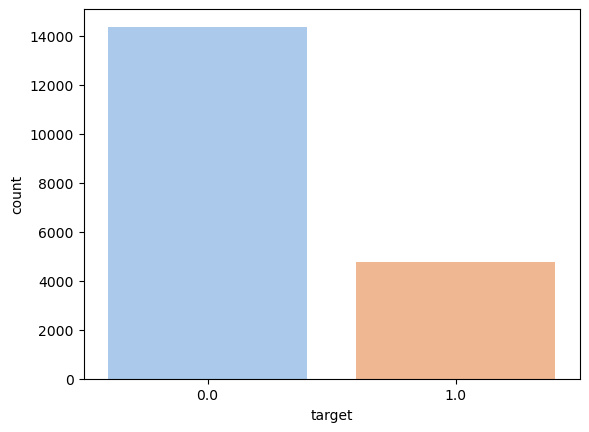

In [21]:
col_percents(df, 'target', 0.0, 1.0)

used function for categorical and a histogram/histplot/correlation/crossplot for anything numeric

heatmap

### Data Cleaning

In [22]:
df.isna().sum()

city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
training_hours            0
target                    0
dtype: int64

In [23]:
df['enrolled_university'].value_counts(dropna = False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [33]:
df['education_level'].value_counts(dropna = False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [34]:
df['company_size'].replace({'10/49': '10-49'}, inplace = True)

In [35]:
df.drop(['enrollee_id', 'city_development_index'], axis=1, inplace=True)

KeyError: "['enrollee_id' 'city_development_index'] not found in axis"

don't change or rename anything until later. do train test split and then change everything

only mods that are okay before a train test split is renaming, not modifying.

look at everything, rename if needed, create functions for data cleaning, do train_test_split, then apply functions

In [36]:
df['relevent_experience']

0        Has relevent experience
1         No relevent experience
2         No relevent experience
3         No relevent experience
4        Has relevent experience
                  ...           
19153     No relevent experience
19154    Has relevent experience
19155    Has relevent experience
19156    Has relevent experience
19157     No relevent experience
Name: relevent_experience, Length: 19158, dtype: object

In [37]:
df['relevent_experience'].replace({'Has relevent experience': 1, 'No relevent experience': 0}, inplace = True)

In [38]:
df['relevent_experience'].value_counts()

1    13792
0     5366
Name: relevent_experience, dtype: int64

## Preprocessing

simpleimputer

In [39]:
# University - replace null with no enrollment, median, most frequent

For drops, drop columns before train test split

In [40]:
# Creating variables for a train test split

X = df.drop('target', axis = 1)
y = df['target']

# Calling the train test split on my data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14368 entries, 3465 to 235
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 14368 non-null  object
 1   gender               11024 non-null  object
 2   relevent_experience  14368 non-null  int64 
 3   enrolled_university  14067 non-null  object
 4   education_level      14007 non-null  object
 5   major_discipline     12233 non-null  object
 6   experience           14320 non-null  object
 7   company_size         9893 non-null   object
 8   company_type         9716 non-null   object
 9   last_new_job         14058 non-null  object
 10  training_hours       14368 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [46]:
# Separating the numerical and categorical variables in the X_train df

X_train_n = X_train[['relevent_experience', 'training_hours']]
X_train_c = X_train[['city', 'gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience',
                     'company_size', 'company_type', 'last_new_job']]

In [51]:
# Establishing a pipieline use standard scaler and one hot encode the categorical df

num_pipe = Pipeline(steps = [('num_imputer', SimpleImputer(strategy = 'median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps = [('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
                           ('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

# Calling ColumnTransformer to combine the num and cat df's after the prior steps

cf = ColumnTransformer(transformers = [('categorical_pipeline', cat_pipe, X_train_c.columns), 
                                       ('numerical_pipeline', num_pipe, X_train_n.columns)])

## Modeling

In [52]:
# Creating a baseline model with logistic regression

lr_base = Pipeline(steps = [('cf', cf), 
                            ('lr', LogisticRegression(class_weight = 'balanced', random_state = 1))])

In [53]:
# Fitting the baseline model by X_train and y_train

lr_base.fit(X_train, y_train)

/Users/deannagould/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cf',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['city', 'gender', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object')),
                                                 ('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                         

### Logistic Regression

#### Model 1

#### Model 1 Check

### Logistic Regression GridSearchCV

#### Model 2 Baseline

#### Model 2 Check

### RandomForest Baseline

#### Model 3

#### Model 3 Check

### RandomForest GridSearchCV

#### Model 4

#### Model 4 Check

### XGBoost Baseline

#### Model 5

#### Model 5 Check

### XGBoost GridSearchCV

#### Model 6

#### Model 6 Check